https://www.tensorflow.org/tutorials/images/cnn?hl=ko

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

In [2]:
tf.__version__

'2.0.0'

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
len(train_labels), len(test_labels)

(60000, 10000)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

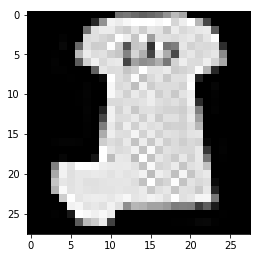

Dress


In [7]:
i = 70
plt.figure(figsize=(4,5))
plt.imshow(train_images[i], cmap='gray')
plt.show()

print(class_names[train_labels[i]])

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
with tf.device('/device:CPU:0'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
with tf.device('/device:CPU:0'):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 496us/sample - loss: 0.4986 - accuracy: 0.8147
Epoch 2/5
60000/60000 [==============================] - 29s 475us/sample - loss: 0.3197 - accuracy: 0.8838
Epoch 3/5
60000/60000 [==============================] - 28s 474us/sample - loss: 0.2738 - accuracy: 0.9002
Epoch 4/5
60000/60000 [==============================] - 28s 474us/sample - loss: 0.2427 - accuracy: 0.9110
Epoch 5/5
60000/60000 [==============================] - 28s 473us/sample - loss: 0.2199 - accuracy: 0.9181


In [11]:
with tf.device('/device:CPU:0'):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 2s - loss: 0.2532 - accuracy: 0.9047
